In [1]:
#Kasey's Branch

In [2]:
#clean up csv files
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Data Exploration 
#### As part of the data exploration we reviewed data sets pertaining to Spotify to determine what data is available. We found the following data sets on Kaggle <https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks> 
#### We reviewed thh 5 csv files that were included in the data set and narrowed down our data analysis to two different files, which include: "data.csv" and "data_by_genres.csv." We decided on these two files due to similar data points and based on the questions we wanted to answer. 
#### For example, there were two csv files related to genre, so we chose to utilize the one that had the artist name. Data by artist csv file had the same information as the with genres file, but didn't have the genre column so we eliminated this data set. 

In [3]:
#variables for files
file = 'Data/data.csv'
file_genre = 'Data/data_by_genres.csv'

In [4]:
#import csvs
genre_df = pd.read_csv(file_genre)
df = pd.read_csv(file)

## Data Exploration - DataFrame review

#### After importing the csv files and further reviewing the datasets using .value_counts() and .describe() we determined that we could answer our questions using the data sets independently. We also found that the data sets had vastly different numbers of data points, so we decided not to merge and utilize separately. 

In [5]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


## Data Cleansing - Dropping Characters 

#### Once we imported the csv files as dataframes we further reviewed the data points to determine what formatting adjustmets needed to be completed. 

#### We found that the artists column needed to remove the brackets and quotes, so we found the following function to remove these unneeded characters: <https://stackoverflow.com/questions/38147447/how-to-remove-square-bracket-from-pandas-dataframe![image.png](attachment:image.png)>

In [6]:
#remove brackets, quotations, etc.
clean_df = df
clean_df['artists'] = df['artists'].str.strip('[]')
clean_df['artists'] = df['artists'].str.strip("''")
clean_df['artists'] = df['artists'].str.strip('""')
clean_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


## Data Cleansing - Columns

#### We updated the dataframe to only include the columns that were relevant for part of the analysis and re-named the column titles to provide better clarity. 

In [7]:
#Drop columns and change column names
clean_df = clean_df[["artists", "danceability", "duration_ms", "explicit", "key", "mode", "name",
                     "popularity", "tempo", "year"]]
clean_df = clean_df.rename(columns={"artists":"Artists", "danceability":"Danceability (0-1)", 
                                    "duration_ms":"Duration (seconds)", "explicit":"Explicit",
                                    "key":"Key", "mode":"Mode", "name":"Song Title",
                                    "popularity":"Popularity (0-100)", "tempo":"Tempo (BPM)", "year":"Release Year"})

clean_df.head()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year
0,Mamie Smith,0.598,168333,0,5,0,Keep A Song In Your Soul,12,149.976,1920
1,Screamin' Jay Hawkins,0.852,150200,0,5,0,I Put A Spell On You,7,86.889,1920
2,Mamie Smith,0.647,163827,0,0,1,Golfing Papa,4,97.600,1920
3,Oscar Velazquez,0.730,422087,0,2,1,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920
4,Mixe,0.704,165224,1,10,0,Xuniverxe,2,122.076,1920


## Data Cleansing - Column Values

#### We found that some of the column values were not easy to understand. 
#### For example, "Explicit" was indicated with a 0 or 1, so this was updated to be either "No" or "Yes." 
#### We also updated the duration in ms to be in seconds. 
#### For Mode and Key we also updated numeric values to be a descriptive string value. 

In [8]:
#update columns with more relevant values
clean_df["Duration (seconds)"] = ((clean_df["Duration (seconds)"]) / 1000)
clean_df['Explicit'] = clean_df['Explicit'].apply(str)
clean_df['Explicit'] = clean_df['Explicit'].str.replace('0', 'No')
clean_df['Explicit'] = clean_df['Explicit'].str.replace('1', 'Yes')
clean_df['Mode'] = clean_df['Mode'].apply(str)
clean_df['Mode'] = clean_df['Mode'].str.replace('0', 'Minor')
clean_df['Mode'] = clean_df['Mode'].str.replace('1', 'Major')
clean_df['Key'] = clean_df['Key'].apply(str)
clean_df['Key'] = clean_df['Key'].str.replace('10', 'Bb')
clean_df['Key'] = clean_df['Key'].str.replace('11', 'B')
clean_df['Key'] = clean_df['Key'].str.replace('0', 'C')
clean_df['Key'] = clean_df['Key'].str.replace('1', 'Db')
clean_df['Key'] = clean_df['Key'].str.replace('2', 'D')
clean_df['Key'] = clean_df['Key'].str.replace('3', 'Eb')
clean_df['Key'] = clean_df['Key'].str.replace('4', 'E')
clean_df['Key'] = clean_df['Key'].str.replace('5', 'F')
clean_df['Key'] = clean_df['Key'].str.replace('6', 'Gb')
clean_df['Key'] = clean_df['Key'].str.replace('7', 'G')
clean_df['Key'] = clean_df['Key'].str.replace('8', 'Ab')
clean_df['Key'] = clean_df['Key'].str.replace('9', 'A')

clean_df.head()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year
0,Mamie Smith,0.598,168.333,No,F,Minor,Keep A Song In Your Soul,12,149.976,1920
1,Screamin' Jay Hawkins,0.852,150.200,No,F,Minor,I Put A Spell On You,7,86.889,1920
2,Mamie Smith,0.647,163.827,No,C,Major,Golfing Papa,4,97.600,1920
3,Oscar Velazquez,0.730,422.087,No,D,Major,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920
4,Mixe,0.704,165.224,Yes,Bb,Minor,Xuniverxe,2,122.076,1920


## Data Cleansing - Second Dataframe - Columns

#### We updated the dataframe to only include the columns that were relevant for part of the analysis and re-named the column titles to provide better clarity. 

In [9]:
#Clean up second dataframe
#Drop columns and change column names
clean_genre_df = genre_df
clean_genre_df = clean_genre_df[["genres", "danceability", "tempo", 
                                 "popularity", "key", "mode"]]
clean_genre_df = clean_genre_df.rename(columns={"genres":"Genres", "danceability":"Danceability (0-1)", 
                                                "key":"Key", "mode":"Mode",
                                                "popularity":"Popularity (0-100)", "tempo":"Tempo (BPM)"})

clean_genre_df.head()

,Genres,Danceability (0-1),Tempo (BPM),Popularity (0-100),Key,Mode
0,21st century classical,0.284100,91.351000,6.600000,4,1
1,432hz,0.312000,118.900933,41.200000,11,1
2,8-bit,0.673000,192.816000,0.000000,5,1
3,[],0.546937,116.068980,12.350770,7,1
4,a cappella,0.516172,105.506031,39.086248,7,1


## Data Cleansing - Second Dataframe - Drop Row 

#### We dropped the Genre value of "[]" by dropping the row index that had this value. 

In [10]:
#drop row with bad data
clean_genre_df = clean_genre_df.drop(3)

## Data Cleansing - Second Dataframe - Column Values

#### We made the same updates to values (besides Explicit as this was not included in this dataset).

In [11]:
#update columns with more relevant values

clean_genre_df['Mode'] = clean_genre_df['Mode'].apply(str)
clean_genre_df['Mode'] = clean_genre_df['Mode'].str.replace('0', 'Minor')
clean_genre_df['Mode'] = clean_genre_df['Mode'].str.replace('1', 'Major')
clean_genre_df['Key'] = clean_genre_df['Key'].apply(str)
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('10', 'Bb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('11', 'B')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('0', 'C')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('1', 'Db')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('2', 'D')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('3', 'Eb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('4', 'E')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('5', 'F')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('6', 'Gb')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('7', 'G')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('8', 'Ab')
clean_genre_df['Key'] = clean_genre_df['Key'].str.replace('9', 'A')

clean_genre_df.head()

,Genres,Danceability (0-1),Tempo (BPM),Popularity (0-100),Key,Mode
0,21st century classical,0.284100,91.351000,6.600000,E,Major
1,432hz,0.312000,118.900933,41.200000,B,Major
2,8-bit,0.673000,192.816000,0.000000,F,Major
4,a cappella,0.516172,105.506031,39.086248,G,Major
5,abstract,0.473600,142.495400,43.800000,F,Major


In [12]:
#Determine how popularity is skewed.
#Create bins for the popularity ratings 0-100)
bins = [0, 9.99, 19.99, 29.99, 39.99, 49.99, 59.99, 69.99, 79.99, 89.99, 100]
labels = ["<10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
clean_df["Popularity Group"] = pd.cut(clean_df["Popularity (0-100)"], bins=bins, labels=labels)

clean_df.head()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year,Popularity Group
0,Mamie Smith,0.598,168.333,No,F,Minor,Keep A Song In Your Soul,12,149.976,1920,10-20
1,Screamin' Jay Hawkins,0.852,150.200,No,F,Minor,I Put A Spell On You,7,86.889,1920,<10
2,Mamie Smith,0.647,163.827,No,C,Major,Golfing Papa,4,97.600,1920,<10
3,Oscar Velazquez,0.730,422.087,No,D,Major,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920,10-20
4,Mixe,0.704,165.224,Yes,Bb,Minor,Xuniverxe,2,122.076,1920,<10


In [13]:
#Create popularity dataframe using fields from clean_df

popularity = clean_df[["Song Title", "Popularity Group", "Artists"]]
popularity.head()

#Create list and variables for capturing and calculating the popularity percentages
popularity_count = []
popularity_count = popularity["Popularity Group"].value_counts()
popularity_total = len(popularity["Popularity Group"])
popularity_percentage = []

#perferorm calculations for popularity groupings and store in a list
popularity_percentage = [(popularity_count[0]/popularity_total)*100,
                        (popularity_count[1]/popularity_total)*100,
                        (popularity_count[2]/popularity_total)*100,
                        (popularity_count[3]/popularity_total)*100,
                        (popularity_count[4]/popularity_total)*100, 
                        (popularity_count[5]/popularity_total)*100, 
                        (popularity_count[6]/popularity_total)*100, 
                        (popularity_count[7]/popularity_total)*100,
                        (popularity_count[8]/popularity_total)*100, 
                        (popularity_count[9]/popularity_total)*100] 

#Create dataframe with total count and percentage of songs calculation
popularity_df = pd.DataFrame({"Total Count": popularity_count, "Percentage of Songs": popularity_percentage}) 
#Format Percentage of songs fields
popularity_df["Percentage of Songs"] = popularity_df["Percentage of Songs"].map("{:.2f}%".format)
popularity_df = popularity_df.sort_index()
popularity_df

,Total Count,Percentage of Songs
<10,17809,15.42%
10-20,15089,8.84%
20-30,23744,8.65%
30-40,26894,10.21%
40-50,21249,13.62%
50-60,15423,12.18%
60-70,9049,5.19%
70-80,3628,2.08%
80-90,555,0.32%
90-100,44,0.03%


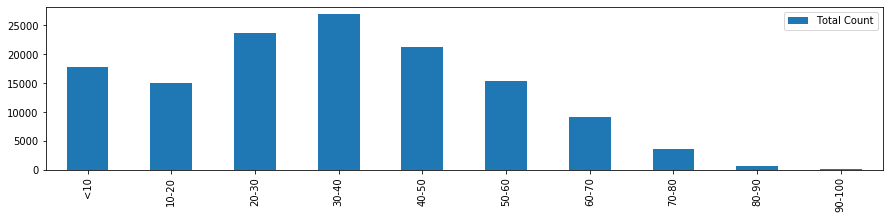

In [19]:
#Show graphical representation of popularity groupings
popularity_df.plot(kind="bar", figsize=(15,3))
plt.savefig("Images/popularity_groupings.png", bbox_inches="tight")
plt.show()

In [15]:
#create new call-name for dataframe
decade_data = df
decade_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [16]:
###FROM CHASE'S FILE###

#create new call-name for dataframe
decade_data = clean_df

#Minimum year is 1920, with max being 2021. Now we set our bins.
bins = [1920, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]

decade = ["1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

#Using bins we create a column just for them.
decade_data["Decades"] = pd.cut(decade_data["Release Year"], bins=bins, labels=decade, include_lowest=True)

#Drop rows for 2020 and 2021, as these are for an incomplete decade.
decade_data.dropna()

,Artists,Danceability (0-1),Duration (seconds),Explicit,Key,Mode,Song Title,Popularity (0-100),Tempo (BPM),Release Year,Popularity Group,Decades
0,Mamie Smith,0.598,168.333,No,F,Minor,Keep A Song In Your Soul,12,149.976,1920,10-20,1920s
1,Screamin' Jay Hawkins,0.852,150.200,No,F,Minor,I Put A Spell On You,7,86.889,1920,<10,1920s
2,Mamie Smith,0.647,163.827,No,C,Major,Golfing Papa,4,97.600,1920,<10,1920s
3,Oscar Velazquez,0.730,422.087,No,D,Major,True House Music - Xavier Santos & Carlos Gomi...,17,127.997,1920,10-20,1920s
4,Mixe,0.704,165.224,Yes,Bb,Minor,Xuniverxe,2,122.076,1920,<10,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...
174116,Workout Music,0.734,277.493,No,C,Minor,RITMO (Bay Boys For Life) [Remix],14,128.015,2019,10-20,2010s
174118,Workout Music,0.533,287.987,No,F,Major,Beautiful People (Remix),14,129.943,2019,10-20,2010s
174120,Workout Music,0.764,268.120,No,D,Major,Tusa (Remix),16,127.994,2019,10-20,2010s
174124,October,0.520,226.603,No,Db,Major,A Good Year - 2020 Remastered,5,123.976,2013,<10,2010s


The correlation between duration and popularity is 0.15


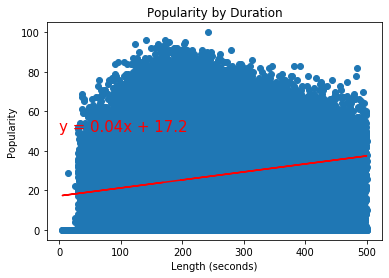

In [18]:
# Calculate the correlation coefficient and linear regression model 

duration = decade_data.loc[decade_data["Duration (seconds)"] < 500]

x = duration["Duration (seconds)"]
y = duration["Popularity (0-100)"]

correlation = st.pearsonr(x,y)
print(f"The correlation between duration and popularity is {round(correlation[0],2)}")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

#Add labels to the scatter plot.
#plt.scatter(x,y)
plt.title("Popularity by Duration")
plt.xlabel("Length (seconds)")
plt.ylabel("Popularity")
plt.savefig("Images/popularity_by_duration.png", bbox_inches="tight")
plt.show()
